22/20

Perfect!

$$\require{mhchem}$$  

# Homework 6
# Pengfei Cheng
## AndrewID: pengfeic

# Problem 1

## Part A

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root, fsolve

# import packages

In [14]:
def tH(t):
    return np.array([t, t ** 2 / 2, t ** 3 / 3, t ** 4 / 4, -1/t, 1, 0, -1]).T

def tS(t):
    return np.array([np.log(t), t, t ** 2 / 2, t ** 3 / 3, - 1 / (2 * t ** 2), 0, 1, 0]).T

# define functions for Shomate equations

In [15]:
# input Shomate Parameters

species = ['CO', 'O2', 'H2', 'CO2', 'H2O', 'CH4', 'CH2O', 'C2H2']

components = ['C', 'H', 'O']

Hf298 = np.array([-110.53, 0, 0, -393.51, -241.826, -74.87, -115.90, 226.73]).T # kJ/mol

SC = np.array([[-1, -0.5, 0, 1, 0, 0, 0, 0],
              [0, -0.5, -1, 0, 1, 0, 0, 0],
              [-1, 0.5, -2, 0, 0, 1, 0, 0],
              [-1, 0, -1, 0, 0, 0, 1, 0],
              [-2, 0.5, -2, 0, 1, 0, 0, 1]]).T

SP = np.array([[25.56759, 6.096130, 4.054656, -2.671301, 0.131021, -118.0089, 227.3665, -110.5271],    # CO
    [31.32234, -20.23531, 57.86644, -36.50624, -0.007374, -8.903471, 246.7945, 0.0],        # O2
    [33.066178, -11.363417, 11.432816, -2.772874, -0.158558, -9.980797, 172.707974, 0.0],   # H2
    [24.99735, 55.18696, -33.69137, 7.948387, -0.136638, -403.6075, 228.2431, -393.5224],   # CO2
    [30.09200, 6.832514, 6.793435, -2.534480, 0.082139, -250.8810, 223.3967, -241.8264],    # H2O
    [-0.703029, 108.4773, -42.52157, 5.862788, 0.678565, -76.84376, 158.7163, -74.87310],   # CH4
    [5.193767, 93.23249, -44.85457, 7.882279, 0.551175, -119.3591, 202.4663, -115.8972],    # CH2O
    [40.68697, 40.73279, -16.17840, 3.669741, -0.658411, 210.7067, 235.0052, 226.7314]])    # C2H2

T = 298.15 # K
t = T / 1000
R = 8.314


H = np.matmul (SP, tH(t)) + Hf298 # kJ/mol
S = np.matmul (SP, tS(t)) / 1000 # kJ/mol/K

G = H - S * T

GR = np.matmul(SC.T, G)

print('The free engery for every reaction at 298K is ', end='')
for i in range (5):
    print('{:1.2f}'.format(GR[i])+' kJ/mol ', end='')

The free engery for every reaction at 298K is -257.21 kJ/mol -228.58 kJ/mol 86.40 kJ/mol 27.24 kJ/mol 254.95 kJ/mol 

## Part B

In [16]:
T2 = 1000; #K
t2 = T2 / 1000;

H2 = np.matmul (SP, tH(t2)) + Hf298
S2 = np.matmul (SP, tS(t2)) / 1000
G2 = H2 - S2 * T2

GR2 = np.matmul(SC.T, G2)

print('The free engery for every reaction at 1000K is ',end='')
for i in range (5):
    print('{:1.2f}'.format(GR2[i])+' kJ/mol ', end='')

The free engery for every reaction at 1000K is -195.61 kJ/mol -192.60 kJ/mol 219.78 kJ/mol 112.21 kJ/mol 377.58 kJ/mol 

## Part C

In [5]:
K = np.exp(-GR2*1000/8.314/1000)
print('The equilibruim constant for every reaction at 1000K is ',end='')
for i in range (5):
    print('{:1.2e}\t'.format(K[i]), end='')

The equilibruim constant for every reaction at 1000K is 1.65e+10	1.15e+10	3.31e-12	1.38e-06	1.89e-20	

In [27]:
print('The Gibbs free energy for each species is', end='')
for i in G2:
    print('{:1.1f} kJ/mol'.format(i))

The Gibbs free energy for each species is-323.4 kJ/mol
-220.9 kJ/mol
-145.5 kJ/mol
-629.4 kJ/mol
-448.6 kJ/mol
-284.2 kJ/mol
-356.7 kJ/mol
-1.3 kJ/mol


In [44]:
Aeq = np.array([[1, 0, 1],
               [0, 0, 1],
               [0, 2, 0],
               [1, 0, 2],
               [0, 2, 1],
               [1, 4, 0],
               [1, 2, 1],
               [2, 2, 0]]).T

beq = np.array([1/6, 2/6, 3/6]).T # feed is equimole of 'CO', 'O2', 'H2'

def eco(n_eq):
    return np.matmul(Aeq, n_eq) - beq

def G_min(n_eq):
    return np.matmul(G2, n_eq)

from scipy.optimize import minimize



y = minimize (G_min, y0, bounds) #, constraints = eco)
y

      fun: -89462025320.84335
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 150
      nit: 1
     njev: 15
   status: 0
  success: True
        x: array([ 29522355.64949232,  20162829.41470403,  13286534.38513227,
        57461515.81723778,  40951079.38388968,  25949308.42229891,
        32565169.18246224,    114987.3685052 ])

## Bonus

In [33]:
y0 = np.array([1/3, 1/3, 1/3, 0, 0, 0, 0, 0]).T
xi0 = np.array([0.3, 0.3, 1e-6, 1e-6, 1e-6])

def G_eq(xi):
    y = y0 + np.matmul(SC, xi)
    yCO, yO2, yH2, yCO2, yH2O, yCH4, yCH2O, yC2H2 = y / np.sum(y)
    m1 = GR2[0] * 1000 + R * T2 * np.log(yCO2/yCO/yO2 ** 0.5)
    m2 = GR2[1] * 1000 + R * T2 * np.log(yH2O/yH2/yO2 ** 0.5)
    m3 = GR2[2] * 1000 + R * T2 * np.log(yCH4*yO2 ** 0.5/yCO/yH2**2)
    m4 = GR2[3] * 1000 + R * T2 * np.log(yCH2O / yCO / yH2)
    m5 = GR2[4] * 1000 + R * T2 * np.log(yC2H2 * yO2 ** 0.5 * yH2O / yCO ** 2 / yH2 ** 2)
    return [m1, m2, m3, m4, m5]

sol = root(G_eq, xi0, method = 'lm') # Use Levenberg-Marquardt algorithm to solve the equations
sol.message

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered

'The relative error between two consecutive iterates is at most 0.000000'

In [7]:
y = y0 + np.matmul(SC,sol.x)
yCO, yO2, yH2, yCO2, yH2O, yCH4, yCH2O, yC2H2 = y / np.sum(y)
K1 = yCO2/yCO/yO2 ** 0.5
K2 = yH2O/yH2/yO2 ** 0.5
K3 = yCH4*yO2 ** 0.5/yCO/yH2**2
K4 = yCH2O / yCO / yH2
K5 = yC2H2 * yO2 ** 0.5 * yH2O / yCO ** 2 / yH2 ** 2
K2 = [K1, K2, K3, K4, K5]
print('The equilibruim constant for every reaction at 1000K is ',end='')
for i in range (5):
    print('{:1.2e}\t'.format(K2[i]), end='')

The equilibruim constant for every reaction at 1000K is 1.65e+10	1.15e+10	3.31e-12	1.38e-06	1.89e-20	

The result is identical with the result in Part C.

When attempting to solve the G_eq using `fsolve` function, it doesn't converge easily (using MINPACK’s hybrd and hybrj algorithms).

In [8]:
sol2, info, ier, mesg = fsolve(G_eq, [0.3, 0.3, 1e-8, 1e-8, 1e-8], full_output = 1)
info

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


{'fjac': array([[ -5.38435683e-01,  -9.50179588e-02,  -2.85054460e-01,
          -3.89574215e-01,  -6.84130462e-01],
        [  5.58902671e-01,  -6.03697563e-01,  -5.57438429e-01,
          -2.75489336e-02,  -1.08076414e-01],
        [ -2.02719518e-01,   4.66317299e-01,  -7.79747621e-01,
           1.62112157e-01,   3.27362597e-01],
        [  1.78217772e-01,   1.42622087e-01,   1.46625737e-07,
          -9.06196797e-01,   3.55956079e-01],
        [  5.69963194e-01,   6.23480519e-01,   4.32488490e-07,
           3.27509673e-07,  -5.35176606e-01]]),
 'fvec': array([-164683.62726491, -161675.58632691,  132877.93385006,
          12646.29151255,  308939.49090664]),
 'nfev': 21,
 'qtf': array([-150125.40769885, -102247.69259399,  -42433.43841643,
          46100.82189707, -360002.31136098]),
 'r': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan])}

It can be noticed that the extents have orders of magnitude that differ greatly, from ~$10^{-1}$ to ~$10^{-44}$. This made the equations a stiff system, and hybrj algorithm is not able to find a solution smoothly, while Levenberg-Marquardt performs well.

In [9]:
sol.x

array([  3.33333273e-01,   3.33333246e-01,   1.02775367e-29,
         1.09022317e-20,   1.06950949e-44])

+2

## Part D

The equilibrium constants and the extents at the equilibrium indicate that when the system is at equilibrium, the 1st & 2nd reaction
\begin{align*}
    \ce{CO + 1/2O2 &<=> CO2}\\
    \ce{H2 + 1/2O2 &<=> H2O}\\
\end{align*}
are almost complete, while the rest reactions
\begin{align*}
    \ce{CO + 2H2 &<=> CH4 + 1/2O2}\\
    \ce{CO +H2 &<=> CH2O }\\
    \ce{2CO +2H2 &<=> C2H2 + 1/2O2 + H2O }
\end{align*}
barely occurs.

# Problem 2

## Part A

In [10]:
Ea = np.array([5, 2, 10]).T # kJ/mol
DG = np.array([-10, -15, 2]).T # kJ/mol

K = np.exp(-DG/8.314/1000* 1000)

for i in range(3):
    print('Reaction {:1.0f} \t'.format(i+1)+'{:1.4f}'.format(K[i]))

Reaction 1 	3.3294
Reaction 2 	6.0750
Reaction 3 	0.7862


## Part B

In [11]:
SC = np.array([[-1, -1, 1, 0, 0],
              [0, -1, -1, 2, 0],
              [0, -1, 0, -2, 2]]).T

xi0 = np.array([-0.01, 0.05, -0.03])
y0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

def K_eq(xi):
    y = y0 + np.matmul(SC, xi)
    yA, yB, yC, yD, yE = y / np.sum(y)
    m1 = K[0] - yC / yA / yB
    m2 = K[1] - yD ** 2 / yB / yC
    m3 = K[2] - yE ** 2 / yB / yD ** 2
    return [m1, m2, m3]

Gmin_sol = fsolve(K_eq, xi0)

y = y0 + np.matmul(SC, Gmin_sol)
y = y / np.sum(y)
print('The equilibrium mol fractions of A, B, C, D, E are ',end='')
for i in range(5):
    print ('{:1.4f}  '.format(y[i]),end='')

The equilibrium mol fractions of A, B, C, D, E are 0.2054  0.1772  0.1212  0.3613  0.1349  

## Part C

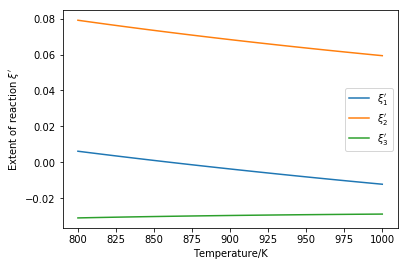

In [12]:
y0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2]).T

Tspan = np.linspace(800, 1000)

def K_eq_T(xi, T):
    K = np.exp(-DG/8.314/T * 1000)
    y = y0 + np.matmul(SC, xi)
    yA, yB, yC, yD, yE = y
    m1 = K[0] - yC / yA / yB
    m2 = K[1] - yD ** 2 / yB / yC
    m3 = K[2] - yE ** 2 / yB / yD ** 2
    return [m1, m2, m3]

K_eq_T_sol = [0] * 50

K_eq_T_sol[49] = fsolve (K_eq_T, xi0, args=1000)

for i in range(49):
    K_eq_T_sol[48-i] = fsolve(K_eq_T, K_eq_T_sol[49-i], args=Tspan[48-i])

plt.plot(Tspan, K_eq_T_sol)
plt.legend(['$\\xi_1\'$','$\\xi_2\'$','$\\xi_3\'$'])
plt.xlabel('Temperature/K')
plt.ylabel('Extent of reaction $\\xi\'$')
plt.show()